<a href="https://colab.research.google.com/github/lennymelnik/pb_dataChallenge/blob/master/analyzingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Timestamp('2019-03-23 00:00:00'), Timestamp('2019-03-24 00:00:00'), Timestamp('2019-03-30 00:00:00'), Timestamp('2019-03-31 00:00:00'), Timestamp('2019-04-06 00:00:00'), Timestamp('2019-04-07 00:00:00'), Timestamp('2019-04-13 00:00:00'), Timestamp('2019-04-14 00:00:00'), Timestamp('2019-04-20 00:00:00'), Timestamp('2019-04-21 00:00:00'), Timestamp('2019-04-27 00:00:00'), Timestamp('2019-04-28 00:00:00'), Timestamp('2019-05-04 00:00:00'), Timestamp('2019-05-05 00:00:00'), Timestamp('2019-05-11 00:00:00'), Timestamp('2019-05-12 00:00:00'), Timestamp('2019-05-18 00:00:00'), Timestamp('2019-05-19 00:00:00'), Timestamp('2019-05-25 00:00:00'), Timestamp('2019-05-26 00:00:00'), Timestamp('2019-06-01 00:00:00'), Timestamp('2019-06-02 00:00:00')]
               DELIVERED_VOLUME  Facility_A  ...  Facility_K  Weekday
DELIVERY_DATE                                ...                     
2019-03-13                  0.0         0.0  ...         0.0        2
2019-03-14                  0.0         0

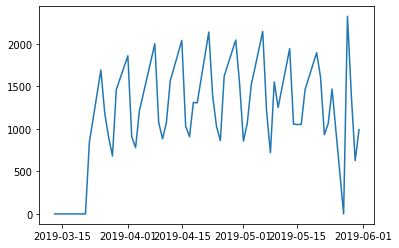

In [28]:
from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division

import warnings
warnings.filterwarnings("ignore")

#import Keras
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split

#initiate plotly


Delivery = pd.read_csv('https://raw.githubusercontent.com/lennymelnik/pb_dataChallenge/master/data/Delivery_Volume.csv', index_col=['DELIVERY_DATE'], parse_dates=['DELIVERY_DATE'])
Delivery.sort_index(inplace=True)

Delivery=Delivery.fillna(0)

date_dataFrame = pd.to_datetime(Delivery.index.values)

weekdayArr = []
toDrop = []
for i in range(len(Delivery.DELIVERED_VOLUME)):
    
    weekday = date_dataFrame[i].weekday()
    if(weekday == 6 or weekday == 5):
      toDrop.append(Delivery.index[i])
    weekdayArr.append(date_dataFrame[i].weekday())
    
print(toDrop)

Delivery['Weekday'] = weekdayArr

Delivery = Delivery.drop(toDrop, axis=0)
print(Delivery)

plt.plot(Delivery.index.values, Delivery['DELIVERED_VOLUME'])


